In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
%matplotlib inline

# Background

A familiar logic problem consists of offering a choice between a seemingly large value compared to a small value that undergoes exponential growth over a period of time.  The problem is often constructed in the form: "choose between being given &#36;1,000,0000 at present or &#36;0.01 that doubles every day for 30 days".  The large number seems incredible in comparison to a penny which doubles every day.  However, it is difficult to estimate the impact of an exponential curve, especially beyond the first few days.

Provided below is the basic math equation for the compounding &#36;0.01 offer; in this problem $n$ represents the number of days and $v$ is the final value.

<center>$v=0.01*2^{(n-1)}$</center>

<center>$v=0.01*2^{(30-1)}=0.01*2^{29}=0.01*536870912=5368709.12$</center>
<br>
This formula can be reconstituted for an arbitrary starting values, in this case $b$.  This enables any starting value to be used.  In the code below, the exponential growth rate could also be changed.  This would mean that rather than doubling (i.e., the values are doubling) it could triple.  The formula below shows how to solve for the intersection point, $n$, between &#36;1,000,000

and a starting value, $b$.

<center>$v=b*2^{(n-1)}$</center>

<center>$v>=b*2^{(n-1)}$</center>

<center>$1000000>=b*2^{(n-1)}$</center>

<center>$log_2(1000000)>=log_2(b)+(n-1)$</center>

<center>$log_2(1000000)-log_2(b)>=n-1$</center>

<center>$log_2(1000000)-log_2(b)+1>=n$</center>

# Functions

In [3]:
def get_number_days_exceed(val_amt_exceed=1e6,val_amt_start=0.01,val_amt_base=2,is_round_up=True):
    rtn_val = math.log(val_amt_exceed,val_amt_base)-math.log(val_amt_start,val_amt_base)+1
    if(is_round_up):
        rtn_val = math.ceil(rtn_val)
    return(rtn_val)

In [4]:
def get_doubled_total(val_amt_base=0.01,val_n=30):
    return(val_amt_base*2**(val_n-1))

# Data Structures

In [5]:
df = pd.DataFrame(list(range(30)),columns=['day'])
df['day'] = df['day']+1
#df.set_index('day',inplace=True)
df['amt_mil'] = 10**6
val_amt_pen = 0.01
val_amt_qrt = 0.25
val_amt_dol = 1.0
for i,row in df.iterrows():
    df.loc[i,'amt_pen'] = val_amt_pen
    if(i<25):
        df.loc[i,'amt_qrt'] = val_amt_qrt
        df.loc[i,'amt_dol'] = val_amt_dol
    else:
        df.loc[i,'amt_qrt'] = np.NaN
        df.loc[i,'amt_dol'] = np.NaN
    val_amt_pen = val_amt_pen*2
    val_amt_qrt = val_amt_qrt*2
    val_amt_dol = val_amt_dol*2
df['is_mil_smaller'] = df['amt_mil'] > df['amt_pen']
df

,day,amt_mil,amt_pen,amt_qrt,amt_dol,is_mil_smaller
0,1,1000000,0.01,0.25,1.0,True
1,2,1000000,0.02,0.50,2.0,True
2,3,1000000,0.04,1.00,4.0,True
3,4,1000000,0.08,2.00,8.0,True
4,5,1000000,0.16,4.00,16.0,True
5,6,1000000,0.32,8.00,32.0,True
6,7,1000000,0.64,16.00,64.0,True
7,8,1000000,1.28,32.00,128.0,True
8,9,1000000,2.56,64.00,256.0,True
9,10,1000000,5.12,128.00,512.0,True


# Comparison Plot

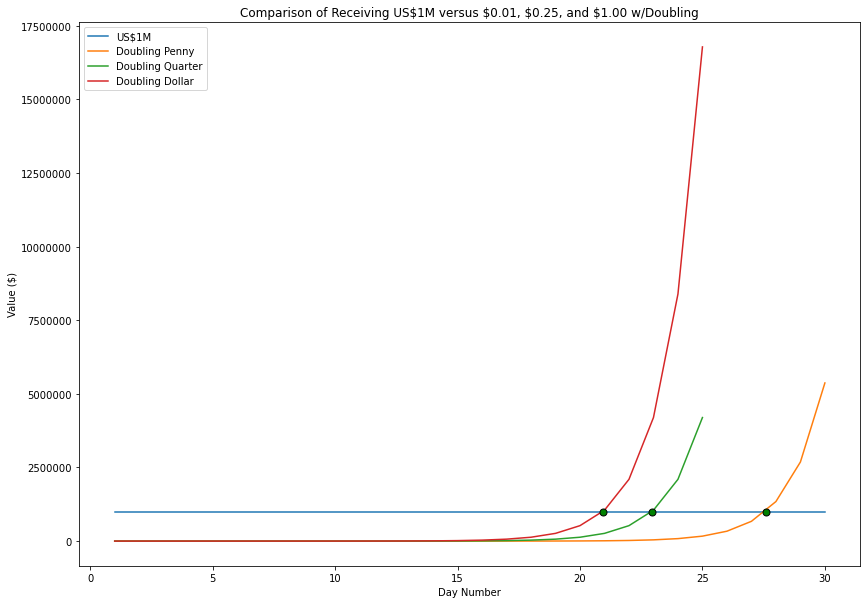

In [6]:
fig,ax = plt.subplots(figsize=(14,10))
ax.plot(df['day'],df['amt_mil'])
ax.plot(df['day'],df['amt_pen'])
ax.plot(df['day'],df['amt_qrt'])
ax.plot(df['day'],df['amt_dol'])
ax.set_ylabel('Value ($)')
ax.set_xlabel('Day Number')
ax.set_title('Comparison of Receiving US\$1M versus \$0.01, \$0.25, and \$1.00 w/Doubling')
ax.ticklabel_format(style='plain')
plt.legend(['US$1M','Doubling Penny','Doubling Quarter','Doubling Dollar'], loc='upper left')
plt.plot(get_number_days_exceed(val_amt_exceed=1e6,val_amt_start=0.01,val_amt_base=2,is_round_up=False),1e6,markeredgecolor='black',markerfacecolor='green',marker="o",markersize=7)
plt.plot(get_number_days_exceed(val_amt_exceed=1e6,val_amt_start=0.25,val_amt_base=2,is_round_up=False),1e6,markeredgecolor='black',markerfacecolor='green',marker="o",markersize=7)
plt.plot(get_number_days_exceed(val_amt_exceed=1e6,val_amt_start=1.,val_amt_base=2,is_round_up=False),1e6,markeredgecolor='black',markerfacecolor='green',marker="o",markersize=7)
plt.show()

# Random Amounts
## Total Values

In [7]:
vec_days = [5,10,20,25,30]
vec_amts = [0.01,0.02,0.25,1.,5.]
for i,amt in enumerate(vec_amts):
    for j,day in enumerate(vec_days):
        tmp_val = get_doubled_total(val_amt_base=amt,val_n=day)
        print(f'- Having ${amt:,.2f} double for {day} days results in a total value of ${tmp_val:,.2f}')
    print('')

- Having $0.01 double for 5 days results in a total value of $0.16
- Having $0.01 double for 10 days results in a total value of $5.12
- Having $0.01 double for 20 days results in a total value of $5,242.88
- Having $0.01 double for 25 days results in a total value of $167,772.16
- Having $0.01 double for 30 days results in a total value of $5,368,709.12

- Having $0.02 double for 5 days results in a total value of $0.32
- Having $0.02 double for 10 days results in a total value of $10.24
- Having $0.02 double for 20 days results in a total value of $10,485.76
- Having $0.02 double for 25 days results in a total value of $335,544.32
- Having $0.02 double for 30 days results in a total value of $10,737,418.24

- Having $0.25 double for 5 days results in a total value of $4.00
- Having $0.25 double for 10 days results in a total value of $128.00
- Having $0.25 double for 20 days results in a total value of $131,072.00
- Having $0.25 double for 25 days results in a total value of $4,194,3

## Intersections

In [8]:
vec_base = [2,3,4,5]
val_amt_exceed = 1e6
for i,base in enumerate(vec_base):
    for j,amt in enumerate(vec_amts):
        tmp_val = get_number_days_exceed(val_amt_exceed=val_amt_exceed,val_amt_start=amt,val_amt_base=base,is_round_up=False)
        print(f'- Having ${amt:,.2f} with a base of {base} reaches ${val_amt_exceed:,.2f} more than {tmp_val:,.2f} days')
    print('')

- Having $0.01 with a base of 2 reaches $1,000,000.00 more than 27.58 days
- Having $0.02 with a base of 2 reaches $1,000,000.00 more than 26.58 days
- Having $0.25 with a base of 2 reaches $1,000,000.00 more than 22.93 days
- Having $1.00 with a base of 2 reaches $1,000,000.00 more than 20.93 days
- Having $5.00 with a base of 2 reaches $1,000,000.00 more than 18.61 days

- Having $0.01 with a base of 3 reaches $1,000,000.00 more than 17.77 days
- Having $0.02 with a base of 3 reaches $1,000,000.00 more than 17.14 days
- Having $0.25 with a base of 3 reaches $1,000,000.00 more than 14.84 days
- Having $1.00 with a base of 3 reaches $1,000,000.00 more than 13.58 days
- Having $5.00 with a base of 3 reaches $1,000,000.00 more than 12.11 days

- Having $0.01 with a base of 4 reaches $1,000,000.00 more than 14.29 days
- Having $0.02 with a base of 4 reaches $1,000,000.00 more than 13.79 days
- Having $0.25 with a base of 4 reaches $1,000,000.00 more than 11.97 days
- Having $1.00 with a b

# Curious Question
So, a curious individual might ask: "if I have \$1,000,000 for 30 days, couldn't I invest that money in something to build earnings?  Sure.  However, what would the daily rate of return need to be to equal the value of doubling the initial amount of \$0.01?  Below is the calculated daily rate of return as a percentage.

In [9]:
print('{:.2f}%'.format(100*(((get_doubled_total(val_amt_base=0.01,val_n=30)/val_amt_exceed)**(1/30))-1)),'per day...')

5.76% per day...
